## Лабораторная работа. Датасет - Flag database##

`https://archive.ics.uci.edu/ml/machine-learning-databases/flags`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Загружаем датасет ###

In [2]:
# сначала нужно задать имена колонок для датасета, берем их из документации
col_names = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours',
             'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires',
             'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']
len(col_names)

30

In [3]:
data = pd.read_csv('flag.data.txt', header=None, names=col_names)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
data.shape

(194, 30)

### Смотрим данные, проводим описательный анализ ###

In [5]:
data.isnull().any().any()

False

In [6]:
data.columns

Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright'],
      dtype='object')

In [7]:
# смотрим последовательно все фичи и определяем, какая требуется предобработка для них, решения по ним будем сохранять в словарь
cols_drop = []
cols_dummies = []
cols_norm = []
cols_labelencode = []

In [8]:
data.name.value_counts()

Seychelles             1
Djibouti               1
Jordan                 1
Taiwan                 1
Nauru                  1
Norway                 1
UAE                    1
Sudan                  1
Denmark                1
Dominican-Republic     1
Bolivia                1
Cook-Islands           1
Iceland                1
Germany-DDR            1
Guam                   1
Costa-Rica             1
Austria                1
Indonesia              1
Bangladesh             1
Spain                  1
Niger                  1
Western-Samoa          1
Hong-Kong              1
Tuvalu                 1
Malawi                 1
Israel                 1
Bulgaria               1
Sao-Tome               1
Pakistan               1
Laos                   1
                      ..
Ecuador                1
Malagasy               1
Trinidad-Tobago        1
Thailand               1
Kiribati               1
Bahamas                1
Qatar                  1
Benin                  1
Turks-Cocos-Islands    1


In [9]:
# name - название страны, категориальный признак с уникальными значениями для каждого семпла, отражает название государства.
# Для классификации использовать его не будем (разве что как-то анализировать текст, но NLP аппарата пока нет и тут это выглядит лишним).
cols_drop.append('name')

In [10]:
data.landmass.value_counts()

4    52
5    39
3    35
1    31
6    20
2    17
Name: landmass, dtype: int64

In [11]:
# landmass - континент страны, категориальный признак, one hot encoding
cols_dummies.append('landmass')

In [12]:
data.zone.value_counts()

1    91
4    58
2    29
3    16
Name: zone, dtype: int64

In [13]:
# zone - географический квадрант страны, категориальный признак, one hot encoding
cols_dummies.append('zone')

In [14]:
data.area.value_counts()

0        34
1         6
28        3
2         2
3         2
4         2
9         2
11        2
21        2
10        2
30        2
36        2
41        2
268       2
111       2
128       2
333       2
18        2
84        2
2777      2
236       2
63        1
547       1
1001      1
43        1
447       1
301       1
5         1
47        1
49        1
         ..
912       1
140       1
9561      1
905       1
91        1
587       1
93        1
98        1
99        1
2150      1
103       1
196       1
108       1
109       1
1247      1
112       1
113       1
1139      1
372       1
118       1
121       1
15        1
637       1
474       1
22402     1
132       1
1284      1
391       1
648       1
804       1
Name: area, Length: 136, dtype: int64

In [15]:
# area - площадь территории страны, числовой признак, нормализация
cols_norm.append('area')

In [16]:
data.population.value_counts()

0       56
1       15
3       13
2       12
6        9
5        7
8        6
4        5
7        5
10       5
9        4
28       4
14       4
15       4
20       3
18       3
39       2
22       2
17       2
11       2
16       2
13       2
56       2
12       1
24       1
1008     1
231      1
31       1
274      1
684      1
157      1
119      1
118      1
90       1
84       1
77       1
61       1
60       1
57       1
54       1
49       1
48       1
47       1
45       1
38       1
36       1
35       1
29       1
Name: population, dtype: int64

In [17]:
# population - население страны, числовой признак, нормализация
cols_norm.append('population')

In [18]:
data.language.value_counts()

10    46
1     43
6     30
2     21
8     19
3     17
4      6
9      4
7      4
5      4
Name: language, dtype: int64

In [19]:
# language - язык страны, категориальный признак, one hot encoding
cols_dummies.append('language')

In [20]:
data.religion.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [21]:
# religion - целевая переменная, категориальный признак, несколько значений, решаем задачу мультиклассификации

In [22]:
data.bars.value_counts()

0    159
3     21
2      7
1      6
5      1
Name: bars, dtype: int64

In [23]:
# bars - количество вертикальных полос, числовой признак, нормализация
cols_norm.append('bars')

In [24]:
data.stripes.value_counts()

0     110
3      44
2      16
5      12
1       4
9       2
14      1
13      1
11      1
7       1
6       1
4       1
Name: stripes, dtype: int64

In [25]:
# stripes - количество горизонтальных полос, числовой признак, нормализация
cols_norm.append('stripes')

In [26]:
data.colours.value_counts()

3    75
4    44
2    42
5    15
6     9
7     7
8     1
1     1
Name: colours, dtype: int64

In [27]:
# colours - число цветов на флаге, числовой признак, нормализация
cols_norm.append('colours')

In [28]:
data.red.value_counts()

1    153
0     41
Name: red, dtype: int64

In [29]:
# red - присутствует ли красный цвет, бинарный признак, оставляем как есть

In [30]:
data.green.value_counts()

0    103
1     91
Name: green, dtype: int64

In [31]:
# green - аналогично

In [32]:
data.blue.value_counts()

1    99
0    95
Name: blue, dtype: int64

In [33]:
# blue - аналогично

In [34]:
data.gold.value_counts()

0    103
1     91
Name: gold, dtype: int64

In [35]:
# gold - аналогично

In [36]:
data.white.value_counts()

1    146
0     48
Name: white, dtype: int64

In [37]:
# white - аналогично

In [38]:
data.black.value_counts()

0    142
1     52
Name: black, dtype: int64

In [39]:
# black - аналогично

In [40]:
data.orange.value_counts()

0    168
1     26
Name: orange, dtype: int64

In [41]:
# orange - аналогично

In [42]:
data.mainhue.value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [43]:
# mainhue - основной цвет флага, категориальный, one hot encoding
cols_dummies.append('mainhue')

In [44]:
data.circles.value_counts()

0    165
1     27
4      1
2      1
Name: circles, dtype: int64

In [45]:
# circles - число кругов на флаге, числовой, нормализация
cols_norm.append('circles')

In [46]:
data.crosses.value_counts()

0    167
1     25
2      2
Name: crosses, dtype: int64

In [47]:
# crosses - число крестов на флаге, числовой, нормализация
cols_norm.append('crosses')

In [48]:
data.saltires.value_counts()

0    176
1     18
Name: saltires, dtype: int64

In [49]:
# saltires - число диагональных крестов, числовой, нормализация
cols_norm.append('saltires')

In [50]:
data.quarters.value_counts()

0    168
1     25
4      1
Name: quarters, dtype: int64

In [51]:
# quarters - число секций, поделенных на 4 части, числовой, нормализация
cols_norm.append('quarters')

In [52]:
data.crescent.value_counts()

0    183
1     11
Name: crescent, dtype: int64

In [53]:
# crescent - есть ли символ полумесяца, бинарный, оставим как есть

In [54]:
data.triangle.value_counts()

0    167
1     27
Name: triangle, dtype: int64

In [55]:
# triangle - есть ли символ треугольника, бинарный, оставим как есть

In [56]:
data.icon.value_counts()

0    145
1     49
Name: icon, dtype: int64

In [57]:
# icon - есть ли неодушевленный предмет, бинарный, оставим как есть

In [58]:
data.animate.value_counts()

0    155
1     39
Name: animate, dtype: int64

In [59]:
# animate - есть ли одушевленный предмет, бинарный, оставим как есть

In [60]:
data.text.value_counts()

0    178
1     16
Name: text, dtype: int64

In [61]:
# text - есть ли буквы, бинарный, оставим как есть

In [62]:
data.topleft.value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64

In [63]:
# topleft - цвет в левом верхнем углу, категориальный, one hot encoding
cols_dummies.append('topleft')

In [64]:
data.botright.value_counts()

red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: botright, dtype: int64

In [65]:
# botright - цвет в правом нижнем углу, категориальный, one hot encoding
cols_dummies.append('botright')

In [66]:
cols_drop, cols_dummies, cols_norm, cols_labelencode

(['name'],
 ['landmass', 'zone', 'language', 'mainhue', 'topleft', 'botright'],
 ['area',
  'population',
  'bars',
  'stripes',
  'colours',
  'circles',
  'crosses',
  'saltires',
  'quarters'],
 [])

In [67]:
del cols_labelencode

### Разделяем данные на обучающую и валидационную выборки ### 

In [68]:
# отделяем целевую переменную
x = data.copy()
x.drop(columns=['religion'], inplace=True)
y = pd.Series(data.religion)

In [69]:
data.shape, x.shape, y.shape

((194, 30), (194, 29), (194,))

In [70]:
# отделяем валидационную выборку
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)

### Препроцессинг данных ###

In [71]:
# удаляем колонку с названиями стран
x_train.drop(columns=cols_drop, inplace=True)
x_valid.drop(columns=cols_drop, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [72]:
# нормализуем числовые данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[cols_norm])
x_train[cols_norm] = scaler.transform(x_train[cols_norm])
x_valid[cols_norm] = scaler.transform(x_valid[cols_norm])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [73]:
# применяем one hot encoding к категориальным данным
x_train = pd.get_dummies(x_train, columns=cols_dummies)
x_valid = pd.get_dummies(x_valid, columns=cols_dummies)

In [74]:
set(x_train.columns) - set(x_valid.columns)

{'botright_brown', 'botright_orange', 'language_7', 'mainhue_black'}

In [75]:
# видно, что некоторые значения фичей "теряются", вручную добавляем "потерянные" столбцы
missing_cols = set(x_train.columns) - set(x_valid.columns)
for c in missing_cols:
    x_valid[c] = 0
x_valid = x_valid[x_train.columns]
set(x_train.columns) - set(x_valid.columns)

set()

In [76]:
list(x_train.columns) == list(x_valid.columns)

True

### Обучение моделей ###

In [77]:
# будем обучать модели, используя GridSearchCV и 3-Fold кросс-валидацию для подбора параметров
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

**Random forest**

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [5, 10, 20, 40, 60, 80, 100, 120],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, 7, 9, None],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}
gs_rf = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy')
gs_rf.fit(x_train, y_train)
print(f'Best train score: {gs_rf.best_score_}')
print(f'Best params: {gs_rf.best_params_}')
print(f'Validation score: {gs_rf.best_estimator_.score(x_valid, y_valid)}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best train score: 0.7483870967741936
Best params: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 80}
Validation score: 0.717948717948718


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [79]:
gs_rf.best_estimator_.feature_importances_

array([5.71476075e-02, 6.98677498e-02, 1.14012050e-02, 2.62624342e-02,
       2.55771669e-02, 9.84760707e-03, 1.55016769e-02, 2.21192092e-02,
       1.59029945e-02, 1.90969515e-02, 1.21293326e-02, 6.67716794e-03,
       1.01848441e-02, 2.01719905e-02, 2.45492668e-03, 5.62523458e-03,
       2.51344574e-02, 9.46939125e-03, 8.28604710e-03, 8.01792931e-03,
       9.39543482e-03, 1.06500540e-03, 4.79269716e-03, 1.15801704e-02,
       2.98700471e-02, 8.67770293e-02, 7.76939637e-02, 6.18277251e-03,
       5.26528998e-02, 1.39632126e-02, 2.00831595e-03, 1.31309676e-02,
       4.05988347e-02, 3.93469961e-02, 8.49152662e-03, 2.05782026e-03,
       1.30505140e-03, 1.10412870e-02, 4.95474020e-03, 3.39072265e-02,
       1.27228097e-03, 2.24643193e-02, 1.97589508e-03, 1.18978301e-02,
       1.40220765e-04, 6.04656753e-03, 6.07331942e-03, 2.81549035e-03,
       1.34100005e-02, 1.04341300e-02, 4.72352488e-03, 5.85620135e-03,
       7.76864161e-04, 1.04981599e-02, 2.62755631e-03, 1.14205382e-02,
      

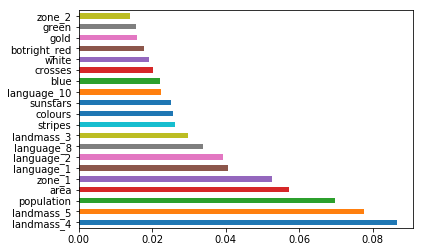

In [80]:
# отобразим важность фичей на графике
feat_importances = pd.Series(gs_rf.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [81]:
# качество классификации по различным метрикам
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_gs_rf = gs_rf.best_estimator_.predict(x_valid)
print(f'Accuracy: {accuracy_score(y_valid, y_pred_gs_rf)}')
print(f'Precision: {precision_score(y_valid, y_pred_gs_rf, average=None)}')
print(f'Recall: {recall_score(y_valid, y_pred_gs_rf, average=None)}')
print(f'F1:{f1_score(y_valid, y_pred_gs_rf, average=None)}')

Accuracy: 0.717948717948718
Precision: [1.         0.66666667 0.71428571 0.         0.         0.6
 1.        ]
Recall: [0.77777778 1.         0.71428571 0.         0.         1.
 0.2       ]
F1:[0.875      0.8        0.71428571 0.         0.         0.75
 0.33333333]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
# строим confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_valid, y_pred_gs_rf)

array([[ 7,  2,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0],
       [ 0,  1,  5,  0,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  3,  0],
       [ 0,  3,  0,  1,  0,  0,  1]], dtype=int64)

**KNN**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'p': [1, 2]
}
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn, knn_params, scoring='accuracy', cv=3)
gs_knn.fit(x_train, y_train)
print(f'Best train score: {gs_knn.best_score_}')
print(f'Best params: {gs_knn.best_params_}')

y_pred_gs_knn = gs_knn.best_estimator_.predict(x_valid)
print(f'Accuracy: {accuracy_score(y_valid, y_pred_gs_knn)}')
print(f'Precision: {precision_score(y_valid, y_pred_gs_knn, average=None)}')
print(f'Recall: {recall_score(y_valid, y_pred_gs_knn, average=None)}')
print(f'F1:{f1_score(y_valid, y_pred_gs_knn, average=None)}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best train score: 0.5935483870967742
Best params: {'n_neighbors': 1, 'p': 1}
Accuracy: 0.6410256410256411
Precision: [0.71428571 0.6875     0.8        0.         0.         0.6
 0.66666667 0.        ]
Recall: [0.55555556 0.91666667 0.57142857 0.         0.         1.
 0.4        0.        ]
F1:[0.625      0.78571429 0.66666667 0.         0.         0.75
 0.5        0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Pr

**SVM**

In [84]:
from sklearn.svm import SVC
svc_params = {
    'C': [0.001, 0.01, 0.1, 0.25, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, scoring='accuracy', cv=3)
gs_svc.fit(x_train, y_train)
print(f'Best params: {gs_svc.best_params_}')

y_pred_gs_svc = gs_svc.best_estimator_.predict(x_valid)
print(f'Accuracy: {accuracy_score(y_valid, y_pred_gs_svc)}')
print(f'Precision: {precision_score(y_valid, y_pred_gs_svc, average=None)}')
print(f'Recall: {recall_score(y_valid, y_pred_gs_svc, average=None)}')
print(f'F1:{f1_score(y_valid, y_pred_gs_svc, average=None)}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamm

Best params: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.6923076923076923
Precision: [0.85714286 0.6        0.83333333 0.         0.         0.75
 1.         0.        ]
Recall: [0.66666667 1.         0.71428571 0.         0.         1.
 0.2        0.        ]
F1:[0.75       0.75       0.76923077 0.         0.         0.85714286
 0.33333333 0.        ]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

**Logistic Regression**

In [85]:
from sklearn.linear_model import LogisticRegression
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 0.25, 0.5]
}
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
gs_lr = GridSearchCV(lr, lr_params, scoring='accuracy', cv=3)
gs_lr.fit(x_train, y_train)
print(f'Best params: {gs_lr.best_params_}')

y_pred_gs_lr = gs_lr.best_estimator_.predict(x_valid)
print(f'Accuracy: {accuracy_score(y_valid, y_pred_gs_lr)}')
print(f'Precision: {precision_score(y_valid, y_pred_gs_lr, average=None)}')
print(f'Recall: {recall_score(y_valid, y_pred_gs_lr, average=None)}')
print(f'F1:{f1_score(y_valid, y_pred_gs_lr, average=None)}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Best params: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.6666666666666666
Precision: [0.71428571 0.66666667 0.71428571 0.         0.         0.6
 0.5       ]
Recall: [0.55555556 1.         0.71428571 0.         0.         1.
 0.2       ]
F1:[0.625      0.8        0.71428571 0.         0.         0.75
 0.28571429]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Сравнение результатов ###

In [86]:
# сравним результаты моделей по метрике Accuracy на валидационной выборке
print('Accuracy on validation set\n')
print(f'Random forest: {accuracy_score(y_valid, y_pred_gs_rf)}')
print(f'KNN: {accuracy_score(y_valid, y_pred_gs_knn)}')
print(f'SVC: {accuracy_score(y_valid, y_pred_gs_svc)}')
print(f'Logistic Regression: {accuracy_score(y_valid, y_pred_gs_lr)}')

Accuracy on validation set

Random forest: 0.717948717948718
KNN: 0.6410256410256411
SVC: 0.6923076923076923
Logistic Regression: 0.6666666666666666


## Выводы ##

- наилучшие результаты по метрике `Accuracy` удалось получить при помощи классификаторов `RandomForest` и `SVC`
- анализ `feature_importances` для случайного леса показал, что важными являются такие признаки, как расположение на африканском или азиатском континентах, а также население и площадь страны
- качество предсказания нельзя назвать очень высоким (максимально удалось добиться `accuracy` около *70 процентов*)
- возможно, для улучшения результата имело смысл как-то иначе делать обработку и предобработку данных, отбросить какие-то признаки (я старался их по возможности сохранять)